In [1]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 39.7 MB 1.2 MB/s 
     |████████████████████████████████| 2.7 MB 78.4 MB/s 
     |████████████████████████████████| 121 kB 67.3 MB/s 
     |████████████████████████████████| 84 kB 4.6 MB/s 
     |████████████████████████████████| 100 kB 14.3 MB/s 
     |████████████████████████████████| 90 kB 13.4 MB/s 
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 1.8.6
    Uninstalling Sphinx-1.8.6:
      Successfully uninstalled Sphinx-1.8.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=a51b1b8239a361db168c171046a621921ce6624a1dc4fef1b790818e2ee9574b
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 21.0 MB/s 
     |████████████████████████████████| 69 kB 4.5 MB/s 
     |████████████████████████████████| 5.6 MB 61.0 MB/s 
     |████████████████████████████████| 10.1 MB 70.6 MB/s 
     |████████████████████████████████| 32.8 MB 1.2 MB/s 
     |████████████████████████████████| 103 kB 72.4 MB/s 
     |████████████████████████████████| 2.3 MB 56.2 MB/s 
     |████████████████████████████████| 112 kB 63.5 MB/s 
     |████████████████████████████████| 73 kB 3.2 MB/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 128 kB of archives.
After this operation, 633 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 antiword amd64 0.37-11build1 [128 kB]
Fetched 128 kB in 0s (280 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-pre

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os,re
import docx2txt
import textract
import pandas as pd
import numpy as np
from docx import Document
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
os.listdir('/content/drive/MyDrive/content/Resumes')

['React Dev_Krishna Kanth_Musquare Technologies.docx',
 'React Developer_Kamalakar Reddy.docx',
 'React Developer_Haripriya.docx',
 'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'React Developer_Sarala Madasu-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'Reactjs Developer_M Lokesh Babu_Musquare Technologies.docx',
 'Reactjs Developer_M Lokesh.docx',
 'Internship_Ravali_Musquare Technologies (1).docx',
 'React Developer_Vinay Reddy.doc',
 'React Developer_Pragnya.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'React Dev_Krishna Kanth.docx',
 'React Developer_Naveen sadhu.docx',
 'Reactjs Developer_Ranga Gaganam_Musquare Technologies.do

In [5]:
file_path = []
category = []

In [6]:
directory = '/content/drive/MyDrive/content/Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer Resume')

In [7]:
file_path, category

(['Ui-Developer/ React JS Developer \n\nNAME: KRISHNA \n\n\n\nPROFESSIONAL SUMMARY:\n\n\t\tOver all 3.2 years of Extensive experience as a\xa0React JS/Web-\xa0Developer\xa0and 1 year\xa0of Experience as\xa0React JS Software Developer.\n\n\t\tExtensive experience in developing web pages using\xa0HTML, XML, CSS, JavaScript, React JS, Redux, JSON.\n\n\t\tExperience in all phase of\xa0SDLC\xa0like\xa0Requirement Analysis, Implementation\xa0and\xa0Maintenance,\xa0and extensive experience with\xa0Agile\xa0and\xa0SCRUM.\n\n\t\tExtensive knowledge in developing single - page applications\xa0(SPAs).\n\n\t\tGood Expertise in analyzing the\xa0Document Object Model (DOM) Layout, DOM Functions, and Java Script functions, Cascading Styles\xa0across cross-browser using\xa0Fire Bug,\xa0Developer Tool Bar.\n\n\t\tExpertise in\xa0React JS\xa0framework to develop the\xa0SPA.\n\n\t\tExperienced in\xa0React JS\xa0and working with\xa0React Flux architecture.\n\n\t\tExperienced in working with\xa0redux archi

In [8]:
file_path_1 = []
category_1 = []

In [9]:
directory_1 = '/content/drive/MyDrive/content/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('PeopleSoft Resume')

In [10]:
file_path_1, category_1

(["\n                        PeopleSoft Admin/PeopleSoft DBA\n\nGanesh Alladi\n\n\n\n\n\nCareer Objective:\n\nI have total 6.4 Years Experience in IT. With my valid expertise of 4.4\nyears in PeopleSoft Admin and PeopleSoft DBA. I hope to enhance my skill\nset while adding value to the business, to enable implementation of\nsolutions, which aid the company’s objectives, understanding and\nanticipating the needs, interests and motivations of the clients and to\ndeliver on time, budget and to quality, Delivering value through improving\nagility, quality and reliability\n\nProfessional Summary:\n\n  ➢ Over 4.4 years of experience in PeopleSoft implementation, Support ,\n    PeopleTools  Upgrades,  Application upgrades ,configuration, migrations,\n    maintenance and administration of Application Server Domains, Process\n    Scheduler Servers, Web Server Domains, PUM  and SES.\n  ➢ Involved in various Tools and Application Upgrades.\n  ➢ Extensively involved in resolving Performance issues

In [11]:
file_path_2 = []
category_2 = []

In [12]:
directory_2 = '/content/drive/MyDrive/content/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Lightning Insight Resume')

In [13]:
file_path_2, category_2

(['SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\n\nCareer Objective :-\n\n\n\nWilling to work under a challenging and professional environment with exposure to new Technologies as a T-SQL in the area of SQL SERVER 2012/2016 with Enterprise Portal and where there is ample scope for Organizational growth as well as individual growth.\n\n\n\nProfessional Experience :-\n\n\n\n2.6 years of experience in Microsoft SQL Server environment, with thorough knowledge of SQL Server 2012/2016 databases. \n\nExpertise in scripting T-SQL queries, Stored Procedures, User Defined Functions and Triggers.\n\nHands on experience in performing Error Handling and performance tuning in Stored Procedure.\n\nGood experienced in creating and using Temporary table, Table Variable and CTE’s (Common table Expressions)\n\nUsed Sub-Queries, Derived table and Joins to simplify complex queries involving multiple tables.\n\nExpertise in creating, maintaining database objects like Indexes, Functions, views, UDF’s, const

In [14]:
file_path_3 = []
category_3 = []

In [15]:
directory_3 = '/content/drive/MyDrive/content/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resume')

In [16]:
file_path_3, category_3

(['VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\n\n\n\nPROFSSIONAL SUMMARY:\n\n\t\n\nOver all 3 years of IT experience as a Workday Consultant.\n\nIntegral in maintenance and creation of Workday Supervisory Organizations, Business Process, Locations, Positions, Company, Cost centers, and Hierarchies.\n\nExperience in understanding the Client Business Requirements, Organizational Hierarchy Setup, Configurable Security Setup and Tenant Setup.\n\nWorked with different Staffing Models, defining Hire restrictions to Job Management, Position Management.\n\nHands on experience with Compensation Module like creating Compensation Grades, Compensation Eligibility Rules, Allowance Plans, Salary Plans, Hourly Plans.\n\nExperience in creating Job Profiles, Job Families, and Job Family Group.\n\nExperience with Workday security groups like Role based security, User based Security, Intersection, and Job based Security.\n\nExperience with creating Staffing models for Supervisory Orgs, Reorganizations

In [17]:
data = pd.DataFrame(data = file_path , columns = ['Resumes'])

In [18]:
data['category'] = category
data

,Resumes,category
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
1,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
3,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume
4,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume
5,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
6,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume
7,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume
8,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume
9,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume


In [19]:
data_1 = pd.DataFrame(data = file_path_1 , columns = ['Resumes'])
data_1['category_1'] = category_1
data_1

,Resumes,category_1
0,\n PeopleSoft Admin/Peo...,PeopleSoft Resume
1,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft Resume
2,\nRahul Ahuja\n-------------------------------...,PeopleSoft Resume
3,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft Resume
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft Resume
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft Resume
6,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Resume
7,\n PeopleSoft Database Ad...,PeopleSoft Resume
8,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft Resume
9,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft Resume


In [20]:
data_2 = pd.DataFrame(data = file_path_2 , columns = ['Resumes'])
data_2['category_2'] = category_2
data_2

,Resumes,category_2
0,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning Insight Resume
1,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resume
2,\n SQL S...,SQL Developer Lightning Insight Resume
3,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning Insight Resume
4,KAMBALLA PRADEEP ...,SQL Developer Lightning Insight Resume
5,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning Insight Resume
6,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Lightning Insight Resume
7,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer Lightning Insight Resume
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer Lightning Insight Resume
9,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning Insight Resume


In [21]:
data_3 = pd.DataFrame(data = file_path_3 , columns = ['Resumes'])
data_3['category_3'] = category_3
data_3

,Resumes,category_3
0,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday Resume
1,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday Resume
2,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday Resume
3,Workday HCM Techno functional Consultant ...,Workday Resume
4,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
5,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resume
6,\n\n Madeeswar A\n...,Workday Resume
7,\n Hari Krishna ...,Workday Resume
8,\nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...,Workday Resume
9,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resume


In [22]:
df = data.append([data_1, data_2, data_3], ignore_index = True)

In [23]:
df

,Resumes,category,category_1,category_2,category_3
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN
1,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN
3,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,NaN,NaN,NaN
4,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,\nName : Naresh Babu Cherukuri\n\n\nObjective...,NaN,NaN,NaN,Workday Resume
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday Resume
76,\n[pic] Name...,NaN,NaN,NaN,Workday Resume
77,G Himaja\n\n ...,NaN,NaN,NaN,Workday Resume


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resumes     79 non-null     object
 1   category    24 non-null     object
 2   category_1  20 non-null     object
 3   category_2  14 non-null     object
 4   category_3  21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [25]:
df['Category'] = category + category_1 + category_2 + category_3
df

,Resumes,category,category_1,category_2,category_3,Category
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,\nName : Naresh Babu Cherukuri\n\n\nObjective...,NaN,NaN,NaN,Workday Resume,Workday Resume
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,NaN,NaN,NaN,Workday Resume,Workday Resume
76,\n[pic] Name...,NaN,NaN,NaN,Workday Resume,Workday Resume
77,G Himaja\n\n ...,NaN,NaN,NaN,Workday Resume,Workday Resume


In [26]:
df.drop(['category', 'category_1', 'category_2', 'category_3'], axis = 1, inplace = True)
df

,Resumes,Category
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
1,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
3,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume
4,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume
...,...,...
74,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday Resume
75,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
76,\n[pic] Name...,Workday Resume
77,G Himaja\n\n ...,Workday Resume


In [27]:
df.head()

,Resumes,Category
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
1,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
3,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume
4,\n\n \n\nName: M. Prabakaran \nTitle: UI Deve...,React JS Developer Resume


In [28]:
df.isna().count()

Resumes     79
Category    79
dtype: int64

In [29]:
def preprocess(txt):
    txt = txt.lower()                                                             # convert all characters in the string to lower case
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                           # remove non-english characters, punctuation and numbers
    txt = re.sub('http\S+\s*', ' ', txt)                                          # remove URLs
    txt = re.sub('RT|cc', ' ', txt)                                               # remove RT and cc
    txt = re.sub('#\S+', '', txt)                                                 # remove hashtags
    txt = re.sub('@\S+', '  ', txt)                                               # remove mentions
    txt = re.sub('\s+', ' ', txt)                                                 # remove extra whitespace
    txt = nltk.tokenize.word_tokenize(txt)                                        # tokenize word
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]     # remove stop words
    return ' '.join(txt) 

In [30]:
df['Resumes'] = df['Resumes'].apply(lambda w: preprocess(w))

In [31]:
df.to_csv('Resume.csv', index=False)

Exploratory Data Analysis

In [32]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('created', 150), ('testing', 150), ('react', 148), ('various', 146), ('oracle', 143), ('role', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('studio', 128), ('core', 128), ('work', 124), ('custom', 124), ('js', 123

In [33]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


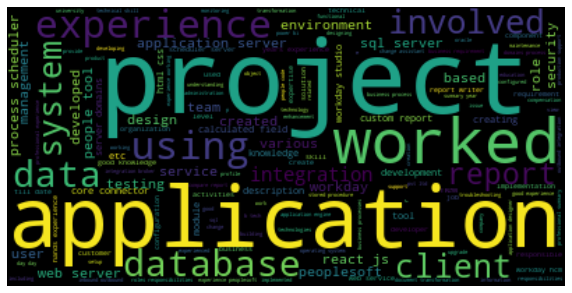

In [34]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
categories = np.sort(df['Category'].unique())
categories

array(['PeopleSoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [36]:
df_categories = [df[df['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
df_categories

[                                              Resumes           Category
 24  peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft Resume
 25  c n c address manyata tech park nagavara banga...  PeopleSoft Resume
 26  rahul ahuja summary years experience peoplesof...  PeopleSoft Resume
 27  profile summary years experience implementing ...  PeopleSoft Resume
 28  peoplesoft admin varkala vikas career objectiv...  PeopleSoft Resume
 29  hari narayana professional summary years exper...  PeopleSoft Resume
 30  anubhav kumar singh core competencies scriptin...  PeopleSoft Resume
 31  peoplesoft database administrator gangareddy p...  PeopleSoft Resume
 32  priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft Resume
 33  sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft Resume
 34  arun venu experience summary experience years ...  PeopleSoft Resume
 35  r ahmed peoplesoft technical consultant profes...  PeopleSoft Resume
 36  classification internal classific

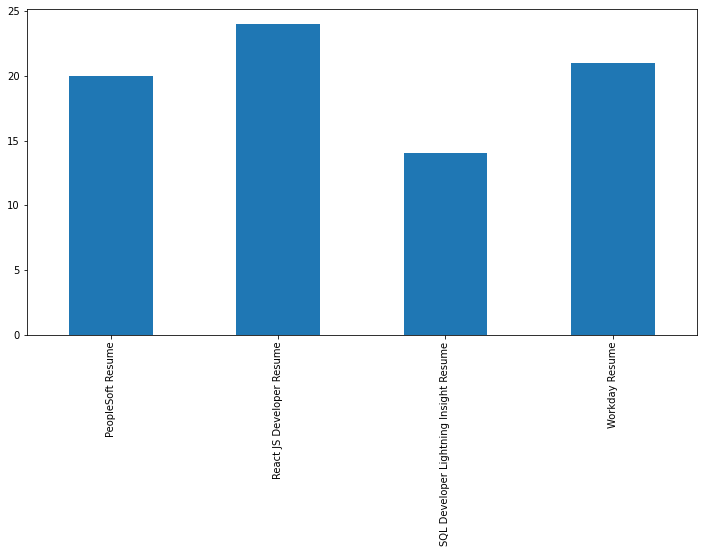

In [37]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [38]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [39]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

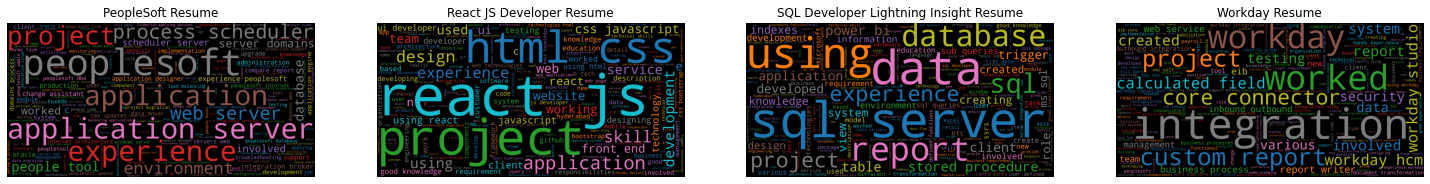

In [40]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [41]:
def wordfreq(df):
    count = df['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

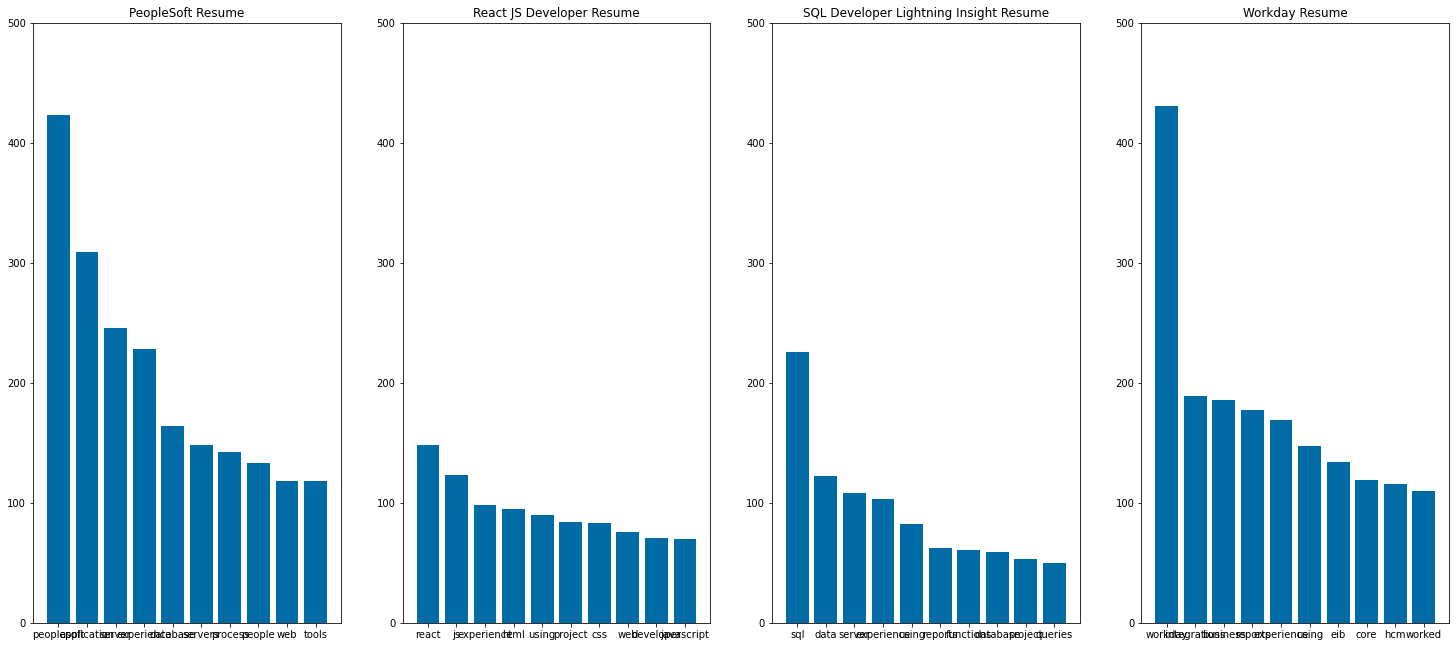

In [42]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [43]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [44]:
df

,Resumes,Category
0,ui developer react js developer name krishna p...,1
1,kamalakar reddy linked www linkedin com kamala...,1
2,haripriya battina experience ui developer reac...,1
3,pranish sonone career summary experience years...,1
4,name prabakaran title ui developer professiona...,1
...,...,...
74,name naresh babu cherukuri objective take resp...,3
75,workday hcm fcm name kumar role workday consul...,3
76,pic name j sumanth royal professional summary ...,3
77,g himaja career objective work towards achievi...,3


In [45]:
df.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

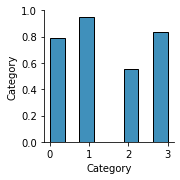

In [46]:
import seaborn as sns
sns.pairplot(data = df)

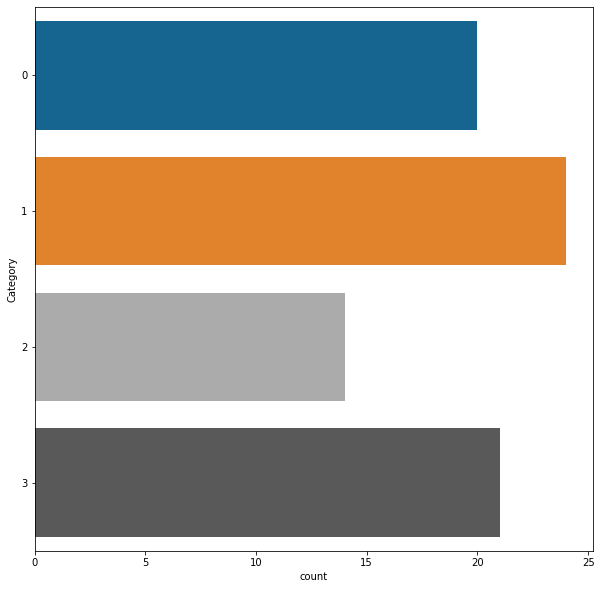

In [47]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=df)

In [48]:
targetCounts = df['Category'].value_counts().reset_index()['Category']
targetLabels  = df['Category'].value_counts().reset_index()['index']

In [49]:
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [50]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

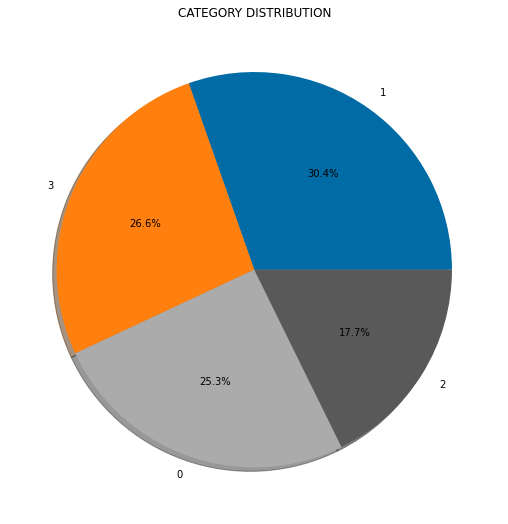

In [51]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

In [52]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==wordfreqdist[i]):
        same=same+1
    elif(lem_words[i]!=wordfreqdist[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 1832
Number of words not Lemmatized= 0


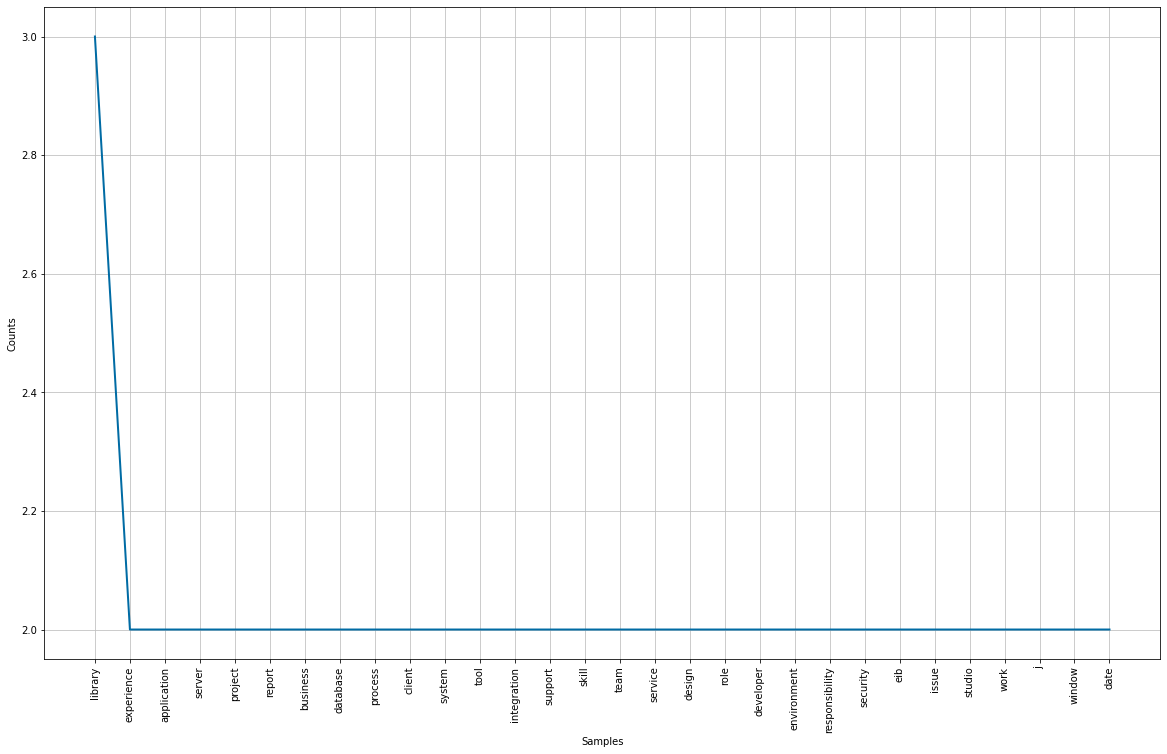

In [53]:
freq_dist = nltk.FreqDist(lem_words)
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [55]:
requiredText = df['Resumes'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [60]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=30, test_size=0.20, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4464), (16, 4464))

In [61]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of Decision Tree Classifier on training set: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set    : {:.4f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 1.0000
Accuracy of Decision Tree Classifier on test set    : 1.0000


In [62]:
print("\n Classification report for Decision Tree Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))


 Classification report for Decision Tree Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [63]:
accuracy_1 = round(accuracy_score(y_test,prediction_1),4)
precision_1 = round(precision_score(y_test,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,prediction_1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,prediction_1, average = 'macro'),4)

In [64]:
print('Accuracy Score   : ', accuracy_1)
print('Precision Score  : ', precision_1)
print('Recall Score     : ', recall_1)
print('f1-Score         : ', f1_1)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_1))

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [65]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.4f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.4f}'.format(sv_clf.score(X_test, y_test)))

Accuracy of Support Vector Classifier on training set: 1.0000
Accuracy of Support Vector Classifier on test set    : 0.8750


In [66]:
print("\n Classification report for Support Vector Classifier %s:\n%s\n" % (sv_clf, metrics.classification_report(y_test, prediction_2)))


 Classification report for Support Vector Classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.85      0.87        16
weighted avg       0.91      0.88      0.87        16




In [67]:
accuracy_2 = round(accuracy_score(y_test,prediction_2),4)
precision_2 = round(precision_score(y_test,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,prediction_2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,prediction_2, average = 'macro'),4)

In [68]:
print('Accuracy Score   : ', accuracy_2)
print('Precision Score  : ', precision_2)
print('Recall Score     : ', recall_2)
print('f1-Score         : ', f1_2)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_2))

Accuracy Score   :  0.875
Precision Score  :  0.9286
Recall Score     :  0.8542
f1-Score         :  0.8726
Confusion Matrix :
 [[3 1 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


In [69]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
prediction_3 = nb_clf.predict(X_test)
print('Accuracy of Multinomial NB Classifier on training set: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.4f}'.format(nb_clf.score(X_test, y_test)))

Accuracy of Multinomial NB Classifier on training set: 1.0000
Accuracy of Multinomial NB Classifier on test set    : 0.7500


In [70]:
print("\n Classification report for Multinomial NB Classifier %s:\n%s\n" % (nb_clf, metrics.classification_report(y_test, prediction_3)))


 Classification report for Multinomial NB Classifier MultinomialNB():
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       0.57      1.00      0.73         4

    accuracy                           0.75        16
   macro avg       0.85      0.73      0.71        16
weighted avg       0.84      0.75      0.72        16




In [71]:
accuracy_3 = round(accuracy_score(y_test,prediction_3),4)
precision_3 = round(precision_score(y_test,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,prediction_3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,prediction_3, average = 'macro'),4)

In [72]:
print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_3))

Accuracy Score  :  0.75
Precision Score :  0.8512
Recall Score    :  0.7292
f1-Score        :  0.7091
Confusion Matrix:
 [[1 0 0 3]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


In [73]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
prediction_4 = logistic_clf.predict(X_test)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training set: 1.0000
Accuracy of Logistic Regression Classifier on test set    : 0.8750


In [74]:
print("\n Classification report for Logistic Regression Classifier %s:\n%s\n" % (logistic_clf, metrics.classification_report(y_test, prediction_4)))


 Classification report for Logistic Regression Classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.85      0.87        16
weighted avg       0.91      0.88      0.87        16




In [75]:
accuracy_4 = round(accuracy_score(y_test,prediction_4),4)
precision_4 = round(precision_score(y_test,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,prediction_4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,prediction_4, average = 'macro'),4)

In [76]:
print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_4))

Accuracy Score  :  0.875
Precision Score :  0.9286
Recall Score    :  0.8542
f1-Score        :  0.8726
Confusion Matrix:
 [[3 1 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


In [77]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
prediction_5 = ab_clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(X_test, y_test)))

Accuracy of AdaBoost Classifier on training set: 0.7460
Accuracy of AdaBoost Classifier on test set    : 0.6875


In [78]:
print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf, metrics.classification_report(y_test, prediction_5)))


 Classification report for AdaBoost Classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.62      1.00      0.77         5
           2       0.60      1.00      0.75         3
           3       1.00      0.75      0.86         4

    accuracy                           0.69        16
   macro avg       0.56      0.69      0.59        16
weighted avg       0.56      0.69      0.60        16




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
accuracy_5 = round(accuracy_score(y_test,prediction_5),4)
precision_5 = round(precision_score(y_test,prediction_5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,prediction_5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,prediction_5, average = 'macro'),4)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_5))

Accuracy Score  :  0.6875
Precision Score :  0.5562
Recall Score    :  0.6875
f1-Score        :  0.5941
Confusion Matrix:
 [[0 2 2 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 1 0 3]]


In [81]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
prediction_6 = gb_clf.predict(X_test)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(X_test, y_test)))

Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 1.0000


In [82]:
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction_6)))


 Classification report for GradientBoosting Classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [83]:
accuracy_6 = round(accuracy_score(y_test,prediction_6),4)
precision_6 = round(precision_score(y_test,prediction_6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,prediction_6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,prediction_6, average = 'macro'),4)

In [84]:
print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_6))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [85]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [86]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
prediction_7 = xgb_clf.predict(X_test)
print('Accuracy of XtremeGradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of XtremeGradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of XtremeGradientBoosting Classifier on training set: 1.0000
Accuracy of XtremeGradientBoosting Classifier on test set    : 1.0000


In [87]:
print("\n Classification report for XtremeGradientBoosting Classifier %s:\n%s\n" % (xgb_clf, metrics.classification_report(y_test, prediction_7)))


 Classification report for XtremeGradientBoosting Classifier XGBClassifier(objective='multi:softprob'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [88]:
accuracy_7 = round(accuracy_score(y_test,prediction_7),4)
precision_7 = round(precision_score(y_test,prediction_7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,prediction_7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,prediction_7, average = 'macro'),4)

In [89]:
print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_7))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [90]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
prediction_8 = lgb_clf.predict(X_test)
print('Accuracy of LightGradientBoosting Classifier on training set: {:.4f}'.format(lgb_clf.score(X_train, y_train)))
print('Accuracy of LightGradientBoosting Classifier on test set    : {:.4f}'.format(lgb_clf.score(X_test, y_test)))

Accuracy of LightGradientBoosting Classifier on training set: 1.0000
Accuracy of LightGradientBoosting Classifier on test set    : 0.9375


In [91]:
print("\n Classification report for LightGradientBoosting Classifier %s:\n%s\n" % (lgb_clf, metrics.classification_report(y_test, prediction_8)))


 Classification report for LightGradientBoosting Classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89         5
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.94      0.95      0.94        16
weighted avg       0.95      0.94      0.94        16




In [92]:
accuracy_8 = round(accuracy_score(y_test,prediction_8),4)
precision_8 = round(precision_score(y_test,prediction_8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,prediction_8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,prediction_8, average = 'macro'),4)

In [93]:
print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_8))

Accuracy Score  :  0.9375
Precision Score :  0.9375
Recall Score    :  0.95
f1-Score        :  0.9365
Confusion Matrix:
 [[4 0 0 0]
 [0 4 1 0]
 [0 0 3 0]
 [0 0 0 4]]


In [94]:
table = {'Classifier' : ['Random Forest Classifier', 'SVM Classifier', 'Multinomial NB Classifier', 'Logistic Regression', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'], 'Accuracy Score' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8], 'f1-Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8]}
table = pd.DataFrame(table)
table

,Classifier,Accuracy Score,Precision Score,Recall Score,f1-Score
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
1,SVM Classifier,0.8750,0.9286,0.8542,0.8726
2,Multinomial NB Classifier,0.7500,0.8512,0.7292,0.7091
3,Logistic Regression,0.8750,0.9286,0.8542,0.8726
4,AdaBoost Classifier,0.6875,0.5562,0.6875,0.5941
5,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
6,Xtreme Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
7,Light Gradient Boosting Classifier,0.9375,0.9375,0.9500,0.9365
